In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('C:/Users/KIIT/Downloads/mini_project/calories.csv')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [11]:
df.shape

(15000, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [13]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


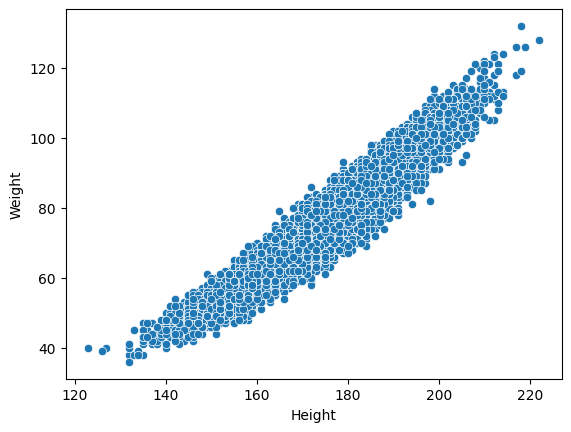

In [14]:
sb.scatterplot(x='Height', y='Weight', data=df)
plt.show()

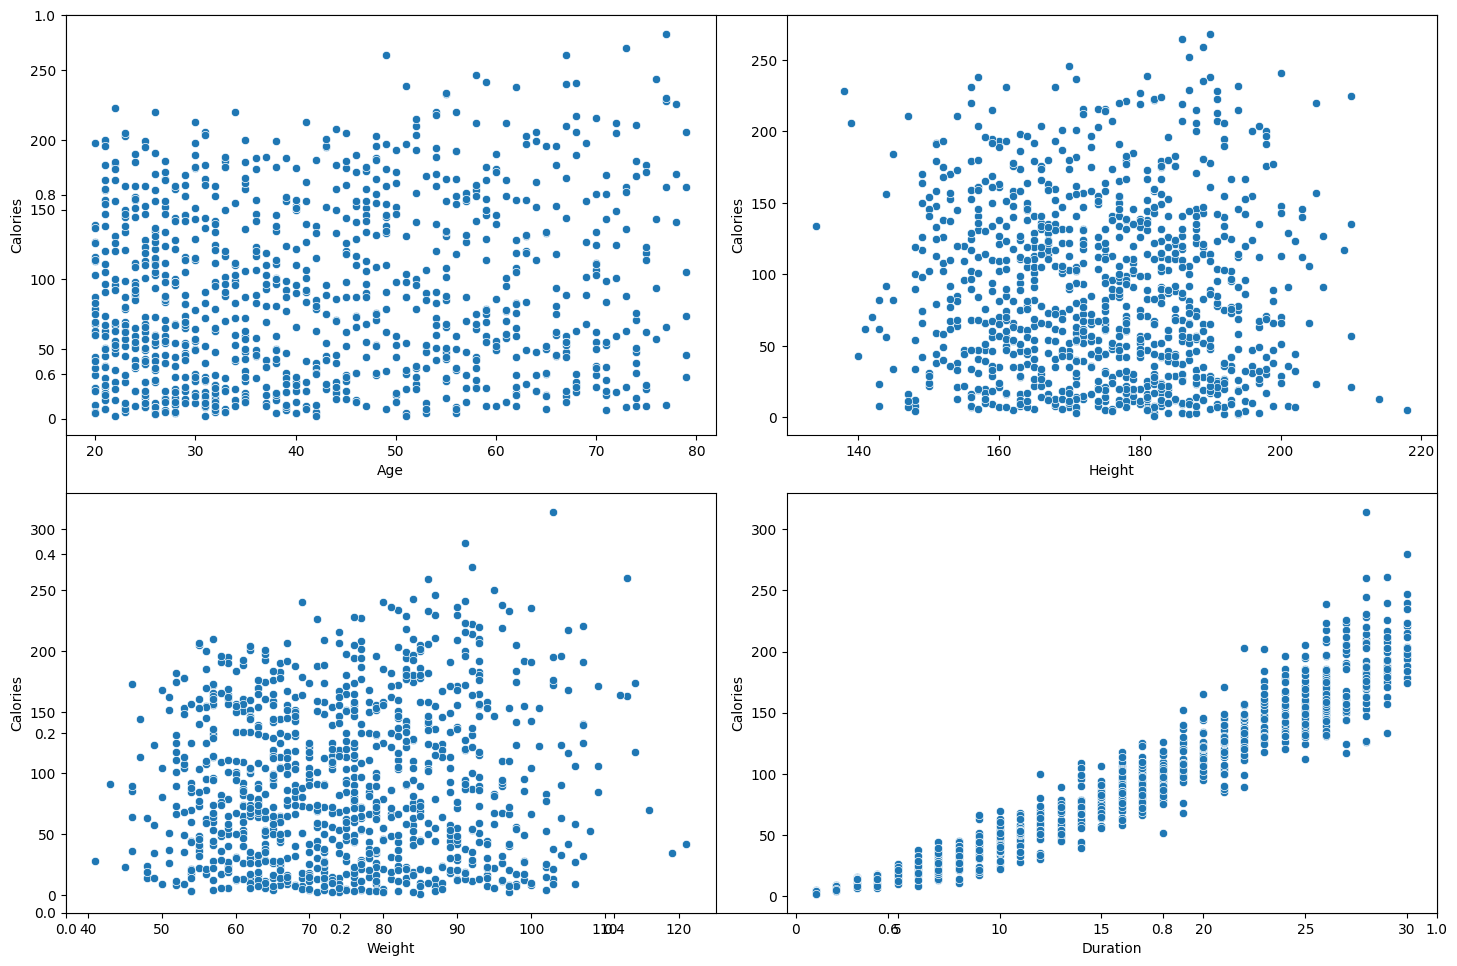

In [15]:
features = ['Age', 'Height', 'Weight', 'Duration']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    x = df.sample(1000)
    sb.scatterplot(x=col, y='Calories', data=x)
plt.tight_layout()
plt.show()

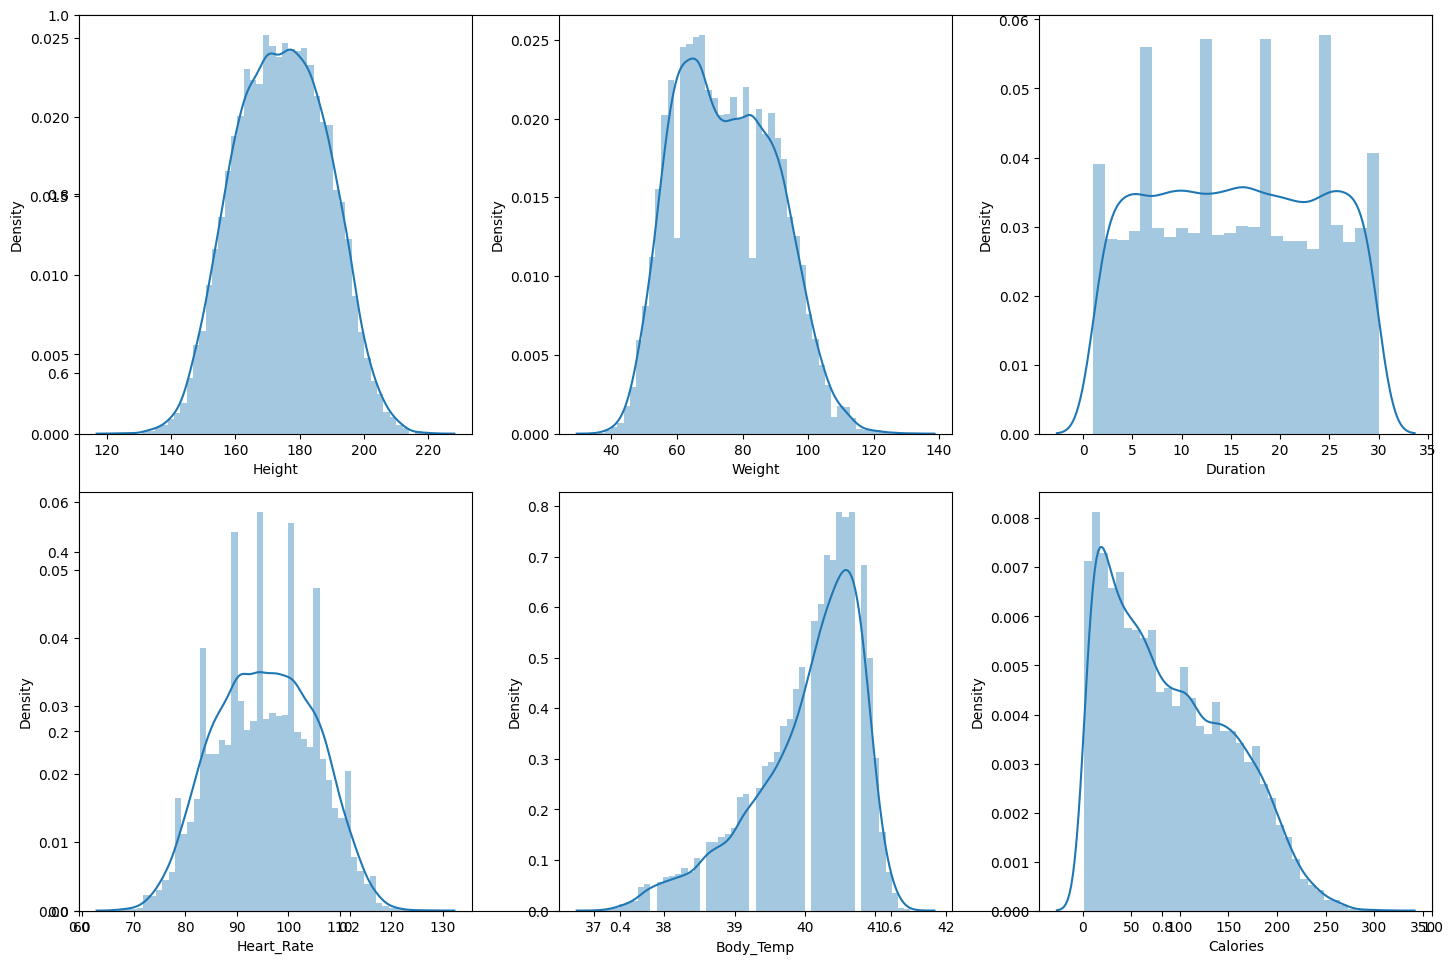

In [16]:
features = df.select_dtypes(include='float').columns

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

In [17]:
df.replace({'male': 0, 'female': 1},
           inplace=True)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


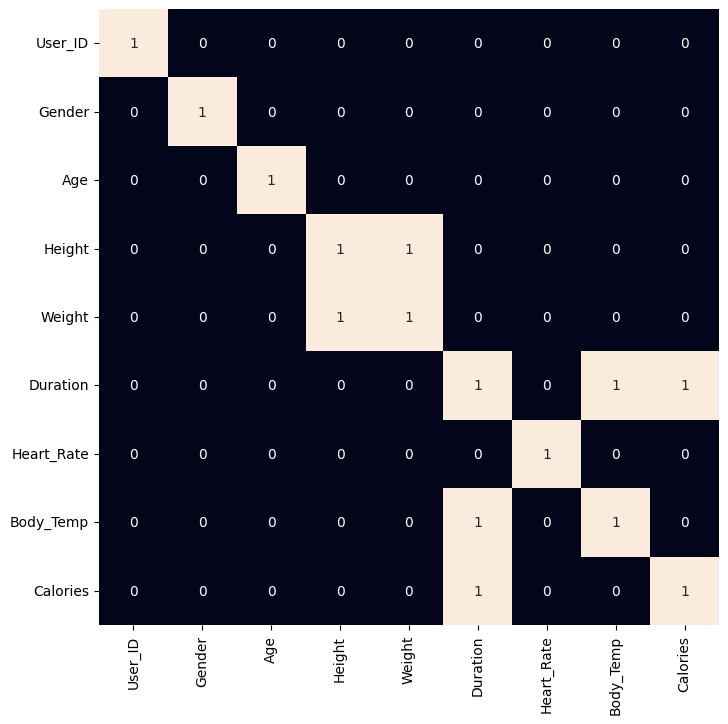

In [18]:
plt.figure(figsize=(8, 8))
sb.heatmap(df.corr() > 0.9,
           annot=True,
           cbar=False)
plt.show()

In [19]:
to_remove = ['Weight', 'Duration']
df.drop(to_remove, axis=1, inplace=True)

In [20]:
features = df.drop(['User_ID', 'Calories'], axis=1)
target = df['Calories'].values

X_train, X_val,\
    Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.1,
                                      random_state=22)
X_train.shape, X_val.shape

((13500, 5), (1500, 5))

In [ ]:
# Normalizing features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [22]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), XGBRegressor(),
          Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')

    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))

    val_preds = models[i].predict(X_val)
    print('Validation Error : ', mae(Y_val, val_preds))
    print()

LinearRegression() : 
Training Error :  17.893463692619434
Validation Error :  18.007896272831253

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...) : 
Training Error :  7.89463304294701
Validation Error :  10.12050432946533

Lasso() : 
Training Error :  17.915089584958036
Validation Error :  17.995

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np


model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Regression output

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    X_train, Y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

if len(X_train.shape) == 1:
    X_train = np.expand_dims(X_train, axis=1) 

try:
    predictions = model.predict(X_train[:1])  # Predicting on first sample as example
    print("Prediction:", predictions[0][0])  # Accessing the scalar prediction value
except Exception as e:
    print("Prediction failed:", str(e))


Epoch 1/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6645.5732 - mae: 58.3264 - val_loss: 237.9883 - val_mae: 11.4858
Epoch 2/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 362.2548 - mae: 14.0123 - val_loss: 214.9843 - val_mae: 10.7230
Epoch 3/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 332.1165 - mae: 13.2758 - val_loss: 200.9695 - val_mae: 10.2767
Epoch 4/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 325.8034 - mae: 12.9553 - val_loss: 196.4150 - val_mae: 10.0504
Epoch 5/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 337.9146 - mae: 13.1652 - val_loss: 194.3931 - val_mae: 9.9574
Epoch 6/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 328.5917 - mae: 12.8161 - val_loss: 190.2816 - val_mae: 9.8579
Epoch 7/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 315.0825 - mae: 12.7017 - val_loss: 204.1978 - val_mae: 10.1176
Epoch 8/100
380/380 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 321.1766 - mae: 12.7178 - val_loss: 203.8245 - val_mae: 10.1033
E

In [25]:
loss, mae = model.evaluate(X_val, Y_val)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 197.5774 - mae: 9.7809
Test Loss: 204.7786865234375
Test MAE: 10.123096466064453


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


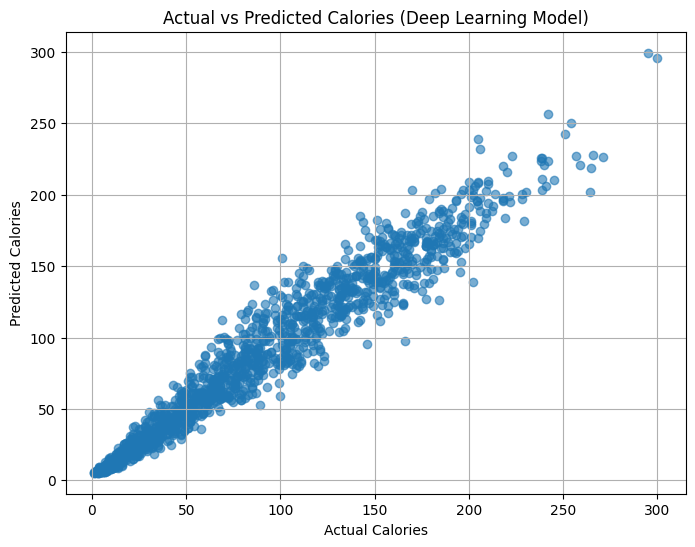

In [27]:
import matplotlib.pyplot as plt
import pickle

y_pred = model.predict(X_val).flatten()

plt.figure(figsize=(8, 6))
plt.scatter(Y_val, y_pred, alpha=0.6)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories (Deep Learning Model)")
plt.grid(True)
plt.show()


# Save model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)




In [ ]:
!pip install flask pyngrok

In [ ]:
!ngrok config add-authtoken 2vR50afC0az90sf3Cf6brobelXe_68r2tgwncVN3H3S5Td4u2

In [ ]:
from flask import Flask, request, render_template_string
from pyngrok import ngrok
import pickle
import numpy as np

# Load model
with open("model.pkl", "rb") as f:
    model = pickle.load(f)
print("✅ Model loaded successfully.")

# Initialize Flask 
app = Flask(__name__)

# HTML + CSS Template
html = """
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <title>Calories Burnt Predictor</title>
  <style>
    body {
      margin: 0;
      padding: 0;
      font-family: 'Segoe UI', sans-serif;
      background: #f2f6fc;
      height: 100vh;
      display: flex;
      justify-content: center;
      align-items: center;
      color: #333;
    }

    .card {
      background: #ffffff;
      padding: 30px 40px;
      border-radius: 20px;
      box-shadow: 0 8px 24px rgba(0, 0, 0, 0.2);
      width: 90%;
      max-width: 450px;
    }

    h2 {
      margin-bottom: 20px;
      color: #1e88e5;
      text-align: center;
    }

    input[type="number"], select, input[type="submit"] {
      width: 100%;
      padding: 12px;
      margin: 10px 0;
      border: 1px solid #ccc;
      border-radius: 10px;
      font-size: 16px;
    }

    input[type="submit"] {
      background-color: #1e88e5;
      color: #fff;
      font-weight: bold;
      cursor: pointer;
      transition: 0.3s ease;
      border: none;
    }

    input[type="submit"]:hover {
      background-color: #1565c0;
    }

    .result {
      margin-top: 20px;
      text-align: center;
      font-size: 18px;
      font-weight: bold;
      color: #2e7d32;
    }
  </style>
</head>
<body>
  <div class="card">
    <h2>Calories Burnt Predictor</h2>
    <form method="post" action="/predict">
      <select name="Gender" required>
        <option value="">Select Gender</option>
        <option value="1">Male</option>
        <option value="0">Female</option>
      </select>
      <input type="number" name="Age" placeholder="Age" required>
      <input type="number" name="Height" placeholder="Height (cm)" required>
      <input type="number" name="Weight" placeholder="Weight (kg)" required>
      <input type="number" name="Duration" placeholder="workout_Duration (min)" required>
      <input type="submit" value="🔥 Predict">
    </form>
    {% if result is defined %}
      <div class="result">Estimated Calories Burnt: {{ result }} kcal</div>
    {% endif %}
  </div>
</body>
</html>
"""

# Routes
@app.route("/", methods=["GET"])
def index():
    return render_template_string(html)

@app.route("/predict", methods=["POST"])
def predict():
    try:
        Gender = float(request.form["Gender"])
        Age = float(request.form["Age"])
        Height = float(request.form["Height"])
        Weight = float(request.form["Weight"])
        Duration = float(request.form["Duration"])

        input_data = np.array([[Gender, Age, Height, Weight, Duration]])
        prediction = model.predict(input_data)

        result = round(float(prediction[0]), 2)
        return render_template_string(html, result=result)

    except Exception as e:
        return f"<h3 style='color:red;'>❌ Prediction failed: {e}</h3>"

public_url = ngrok.connect(5000)
print(f"🌍 App running at: {public_url}")
app.run(port=5000)
ngrok.kill()  
